# **Telecom X - Análisis de Evasión de Clientes**
Melissa Rodríguez

# **📌 Extracción**

In [ ]:
import pandas as pd
import requests
from pandas import json_normalize

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# Aplanar correctamente todas las claves
df = json_normalize(data, sep="_", max_level=None)

# Verificar columnas
print(df.columns.tolist())

# Revisar primeras filas
print(df[['customerID','Churn','customer_Partner','customer_Dependents','phone_PhoneService','account_PaperlessBilling']].head())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']
   customerID Churn customer_Partner customer_Dependents phone_PhoneService  \
0  0002-ORFBO    No              Yes                 Yes                Yes   
1  0003-MKNFE    No               No                  No                Yes   
2  0004-TLHLJ   Yes               No                  No                Yes   
3  0011-IGKFF   Yes              Yes                  No                Yes   
4  0013-EXCHZ   Yes              Yes                  No                Yes   

  account_PaperlessBilling  
0         

# **🔧 Transformación**


In [ ]:
#Explorar las columnas y tipos de datos.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
# ver tipos de datos directamente
df.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [ ]:
#comprobación de la coherencia de los datos
import pandas as pd

# Seleccionar columnas categóricas (tipo object o category)
cols_categoricas = df.select_dtypes(include=['object', 'category']).columns

# Mostrar valores únicos y frecuencia de cada columna categórica
for col in cols_categoricas:
    print(f"\nColumna: {col}")
    print("Valores únicos:", pd.unique(df[col]))
    print("\nFrecuencia de cada categoría:")
    print(df[col].value_counts())


Columna: customerID
Valores únicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Frecuencia de cada categoría:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Columna: Churn
Valores únicos: ['No' 'Yes' '']

Frecuencia de cada categoría:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Columna: customer_gender
Valores únicos: ['Female' 'Male']

Frecuencia de cada categoría:
customer_gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: customer_Partner
Valores únicos: ['Yes' 'No']

Frecuencia de cada categoría:
customer_Partner
No     3749
Yes    3518
Name: count, dtype: int64

Columna: customer_Dependents
Valores únicos: ['Yes' 'No']

Frecuencia de cada categoría:
customer_Dependents
No     5086
Yes    2181
Name: count, dtype: in

In [ ]:
# Manejo de inconsistencias y limpieza de datos
# usando Replace, lower y strip.
import pandas as pd

# 1. Corrección de tipos de datos numéricos (CRÍTICO)
# Si la columna tiene símbolos ($, ,), primero convertir a string y limpiar
if df['account_Charges_Total'].dtype == 'object':
    df.loc[:, 'account_Charges_Total'] = (
        df['account_Charges_Total']
        .str.replace(r'[\$,]', '', regex=True)
        .str.strip()
    )

# Convertir definitivamente a número
df.loc[:, 'account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Verificar cuántos valores quedaron como NaN
num_na = df['account_Charges_Total'].isnull().sum()
print(f"Valores no convertibles (NaN): {num_na}")

# Eliminar filas con NaN (opcional, si quieres trabajar solo con datos limpios)
df = df.dropna(subset=['account_Charges_Total'])

# 2. Normalización de texto en categóricas (ALTA)
cols_categoricas = df.select_dtypes(include=['object','category']).columns
for col in cols_categoricas:
    df.loc[:, col] = df[col].astype(str).str.strip().str.lower()

# 3. Simplificación de categorías redundantes (ALTA)
# Simplificar "no service" en phone/internet
df.loc[:, 'phone_MultipleLines'] = df['phone_MultipleLines'].replace({'no phone service':'no'})

internet_cols = [
    'internet_OnlineSecurity','internet_OnlineBackup','internet_DeviceProtection',
    'internet_TechSupport','internet_StreamingTV','internet_StreamingMovies'
]
for col in internet_cols:
    df.loc[:, col] = df[col].replace({'no internet service':'no'})



Valores no convertibles (NaN): 11


In [ ]:
#Estandarizar: codificar variables binarias----------------------------------------------------opcional
bin_cols = [
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling',
    'Churn'
]

for col in bin_cols:
    df.loc[:, col] = df[col].astype(str).str.strip().str.lower()
    df.loc[:, col] = df[col].map({'yes':1, 'no':0})

# Verificación
for col in bin_cols:
    print(f"\n{col} -> valores únicos: {df[col].unique()}")
    print(df[col].value_counts())


customer_Partner -> valores únicos: [1 0]
customer_Partner
0    3747
1    3509
Name: count, dtype: int64

customer_Dependents -> valores únicos: [1 0]
customer_Dependents
0    5086
1    2170
Name: count, dtype: int64

phone_PhoneService -> valores únicos: [1 0]
phone_PhoneService
1    6551
0     705
Name: count, dtype: int64

account_PaperlessBilling -> valores únicos: [1 0]
account_PaperlessBilling
1    4308
0    2948
Name: count, dtype: int64

Churn -> valores únicos: [0.0 1.0 nan]
Churn
0.0    5163
1.0    1869
Name: count, dtype: int64


In [ ]:
#Startswith
# Filtrar registros donde el método de pago empieza con "credit"
df_credit = df[df['account_PaymentMethod'].str.startswith('credit')]
print(df_credit[['customer_tenure','account_PaymentMethod']].head())
# Contains
## Filtrar registros donde el método de pago contiene "check"
df_check = df[df['account_PaymentMethod'].str.contains('check')]
print(df_check[['customer_tenure','account_PaymentMethod']].head())

    customer_tenure    account_PaymentMethod
5                 9  credit card (automatic)
7                63  credit card (automatic)
10               54  credit card (automatic)
11               72  credit card (automatic)
15               71  credit card (automatic)
   customer_tenure account_PaymentMethod
0                9          mailed check
1                9          mailed check
2                4      electronic check
3               13      electronic check
4                3          mailed check


In [ ]:
# Ver estructura del DataFrame
print(df.info())

# Ver primeras filas para comprobar transformaciones
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7256 non-null   object 
 3   customer_SeniorCitizen     7256 non-null   int64  
 4   customer_Partner           7256 non-null   object 
 5   customer_Dependents        7256 non-null   object 
 6   customer_tenure            7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   object 
 8   phone_MultipleLines        7256 non-null   object 
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   object 
 11  internet_OnlineBackup      7256 non-null   object 
 12  internet_DeviceProtection  7256 non-null   object 
 13  internet_TechSupport       7256 non-null   object 
 1

In [ ]:
#Columna de cuentas diarias ----------------------------------------------------------------------------------(Opcional)
# Crear columna Cuentas_Diarias a partir de la facturación mensual
df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

# Verificar primeras filas
print(df[['account_Charges_Monthly','Cuentas_Diarias']].head())

   account_Charges_Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


# **📊 Carga y análisis**

In [ ]:
# Análisis descriptivo básico: media, mediana y desviación estándar.
print(df.describe())

       customer_SeniorCitizen  customer_tenure  account_Charges_Monthly  \
count               7256.0000      7256.000000              7256.000000   
mean                   0.1629        32.395535                64.755423   
std                    0.3693        24.558067                30.125739   
min                    0.0000         1.000000                18.250000   
25%                    0.0000         9.000000                35.450000   
50%                    0.0000        29.000000                70.300000   
75%                    0.0000        55.000000                89.900000   
max                    1.0000        72.000000               118.750000   

       Cuentas_Diarias  
count      7256.000000  
mean          2.158514  
std           1.004191  
min           0.608333  
25%           1.181667  
50%           2.343333  
75%           2.996667  
max           3.958333  


Distribución de evasión

In [ ]:
# Conteo de clientes que permanecieron vs. los que se dieron de baja
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))  # proporción en %

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64
Churn
0.0    0.734215
1.0    0.265785
Name: proportion, dtype: float64


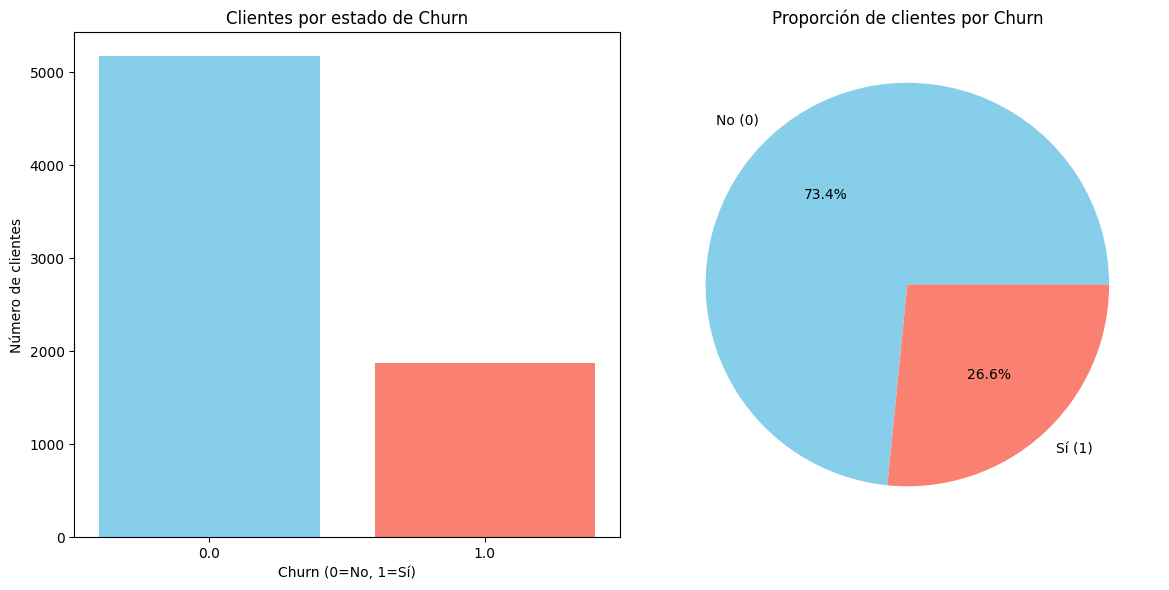

In [ ]:
import matplotlib.pyplot as plt

# Conteos y proporciones
churn_counts = df['Churn'].value_counts()
churn_props = df['Churn'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Gráfico de barras
axes[0].bar(churn_counts.index.astype(str), churn_counts.values, color=['skyblue','salmon'])
axes[0].set_title("Clientes por estado de Churn")
axes[0].set_xlabel("Churn (0=No, 1=Sí)")
axes[0].set_ylabel("Número de clientes")

# Gráfico circular
labels = ['No (0)', 'Sí (1)']
axes[1].pie(churn_props.values, labels=labels, autopct='%1.1f%%', colors=['skyblue','salmon'])
axes[1].set_title("Proporción de clientes por Churn")

plt.tight_layout()
plt.show()

Recuento de evasión por variables categóricas

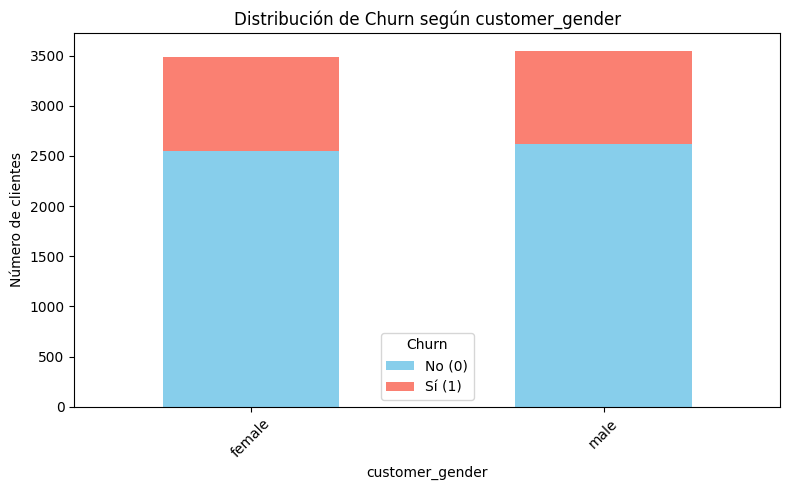

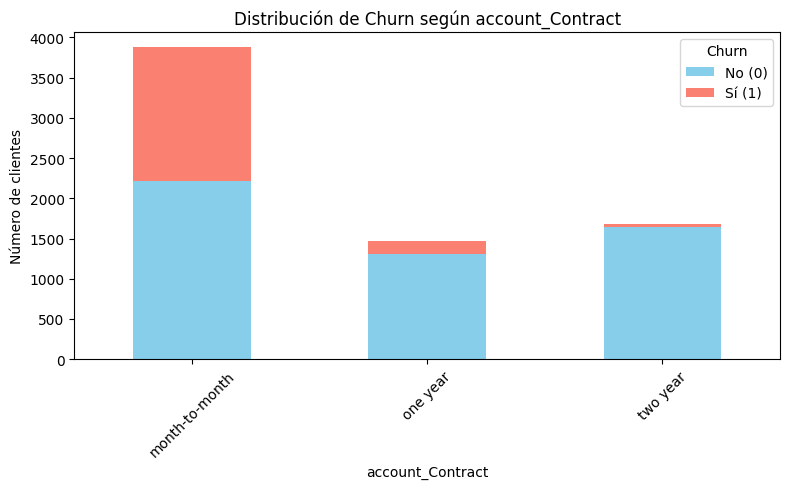

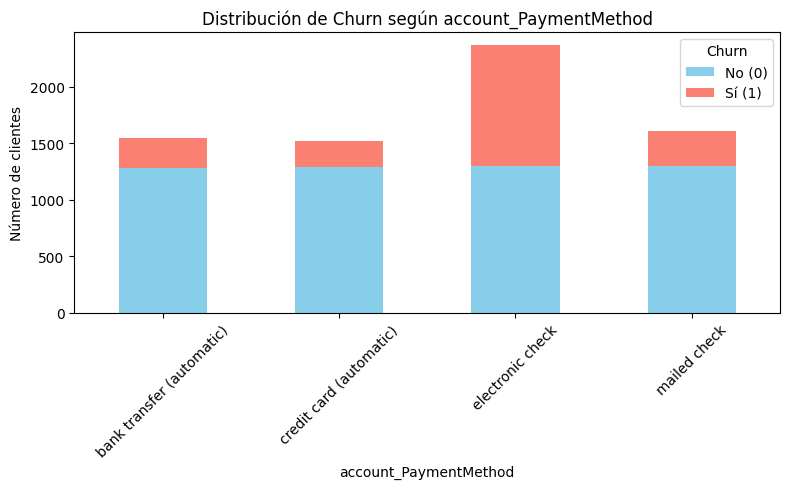

In [ ]:
import matplotlib.pyplot as plt

# Variables categóricas a analizar
categorical_vars = ['customer_gender', 'account_Contract', 'account_PaymentMethod']

for var in categorical_vars:
    # Agrupar por variable y churn
    churn_by_var = df.groupby([var, 'Churn']).size().unstack(fill_value=0)

    # Gráfico de barras apiladas
    churn_by_var.plot(kind='bar', stacked=True, figsize=(8,5), color=['skyblue','salmon'])
    plt.title(f"Distribución de Churn según {var}")
    plt.xlabel(var)
    plt.ylabel("Número de clientes")
    plt.legend(title="Churn", labels=["No (0)", "Sí (1)"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Conteo de evasión por variables numéricas

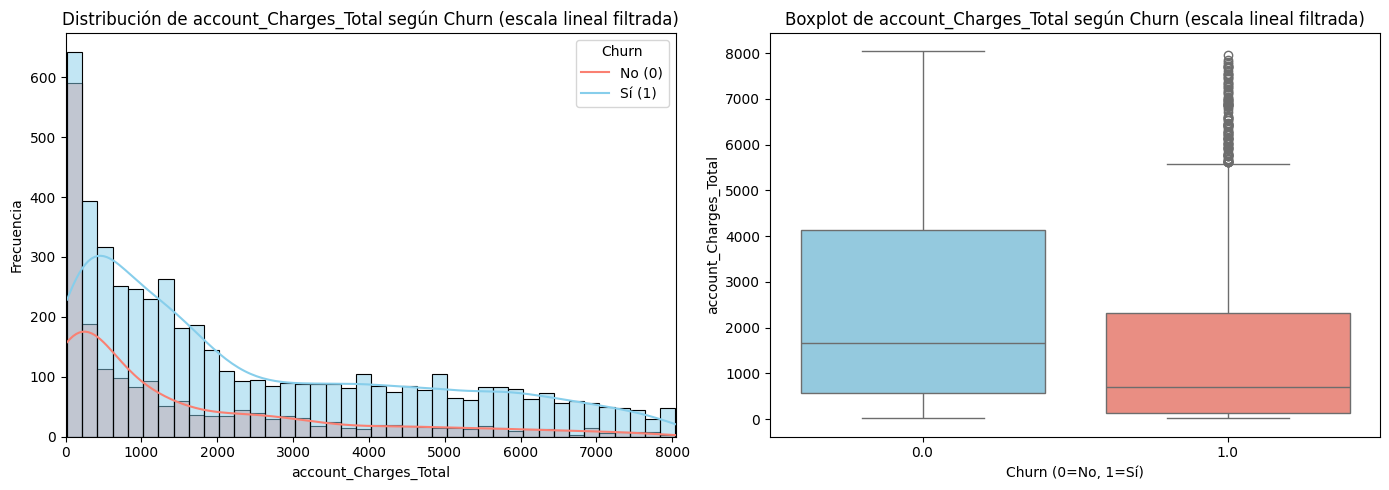

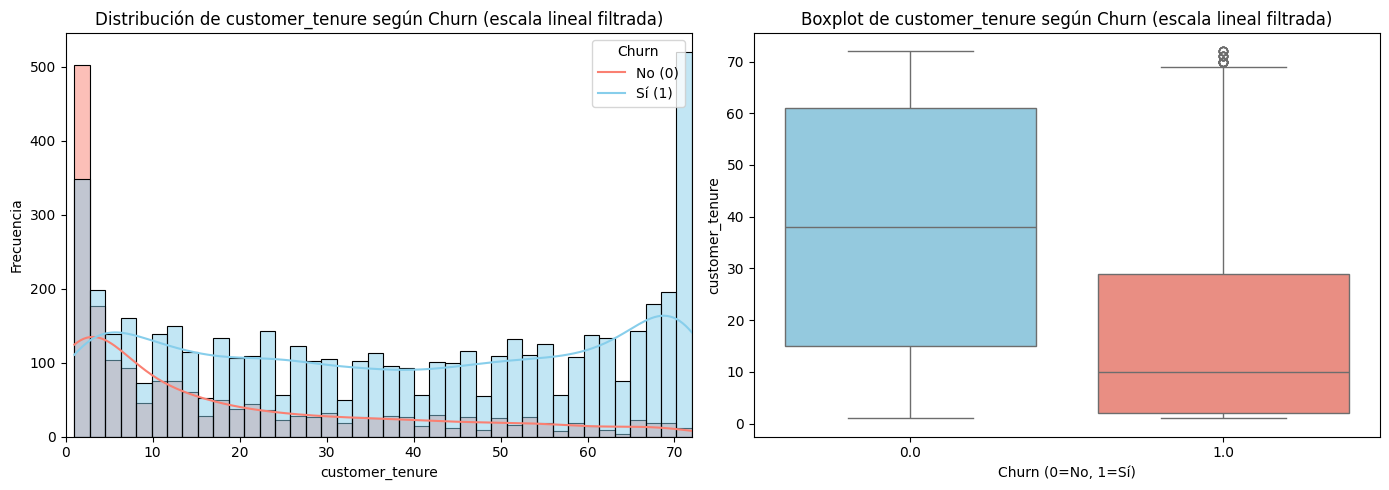

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurar que las columnas sean numéricas
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')

# Eliminar filas con NaN en esas columnas
df = df.dropna(subset=['account_Charges_Total', 'customer_tenure'])

# Variables numéricas a analizar
numeric_vars = ['account_Charges_Total', 'customer_tenure']

for var in numeric_vars:
    # Filtrar valores extremos (ejemplo: top 1% para mejorar escala del eje X)
    x_max = df[var].quantile(0.99)
    df_filtered = df[df[var] <= x_max]

    # Crear panel con 2 subplots (histograma + boxplot)
    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    # =========================
    # Histograma comparativo
    # =========================
    sns.histplot(
        data=df_filtered,
        x=var,
        hue='Churn',
        kde=True,
        bins=40,  # más detalle
        palette={0:'skyblue', 1:'salmon'},
        ax=axes[0]
    )
    axes[0].set_title(f"Distribución de {var} según Churn (escala lineal filtrada)")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel("Frecuencia")
    axes[0].set_xlim(0, x_max)          # limitar eje X
    axes[0].legend(title="Churn", labels=["No (0)", "Sí (1)"], loc="upper right")

    # =========================
    # Boxplot comparativo
    # =========================
    sns.boxplot(
        data=df_filtered,
        x='Churn',
        y=var,
        hue='Churn',
        palette={0:'skyblue', 1:'salmon'},
        dodge=False,
        ax=axes[1]
    )
    axes[1].set_title(f"Boxplot de {var} según Churn (escala lineal filtrada)")
    axes[1].set_xlabel("Churn (0=No, 1=Sí)")
    axes[1].set_ylabel(var)
    axes[1].legend([],[], frameon=False)  # ocultar leyenda duplicada

    plt.tight_layout()
    plt.show()

# **Informe final**

## 🔹 **Introducción**
El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) dentro de una empresa de servicios. El churn representa la pérdida de clientes que deciden cancelar su contrato, lo cual impacta directamente en los ingresos y la sostenibilidad del negocio.
El propósito del estudio es identificar patrones en variables numéricas y categóricas que permitan anticipar comportamientos de abandono y diseñar estrategias de retención más efectivas.

# **🔹 Limpieza y Tratamiento de Datos (ETL)**
El proceso ETL aplicado incluyó las siguientes fases:
Extracción (Extract)
- Se importó el dataset con información de clientes, incluyendo variables de contrato (account_Contract), método de pago (account_PaymentMethod), gasto total (account_Charges_Total), tiempo de permanencia (customer_tenure) y la variable objetivo (Churn).


# **Transformación (Transform)**
- Conversión de tipos:
- Se transformaron las columnas numéricas (account_Charges_Total, customer_tenure) a formato float usando pd.to_numeric(errors='coerce').
- Esto permitió manejar valores no válidos (strings, espacios, etc.), convirtiéndolos en NaN.
- Eliminación de valores nulos:
- Se descartaron registros con valores faltantes en las variables críticas para evitar sesgos en el análisis.
- Filtrado de outliers:
- Se aplicó un recorte en el percentil 99 de las variables numéricas para mejorar la escala de las gráficas y evitar distorsiones provocadas por valores extremos.
- Normalización visual:
- Se ajustaron leyendas y escalas en los gráficos para eliminar warnings y mejorar la claridad.
- Se usaron paletas de colores consistentes (skyblue para Churn=0 y salmon para Churn=1).


# **Carga (Load)**
- Los datos limpios y transformados se cargaron en estructuras listas para análisis exploratorio y visualización con Seaborn y Matplotlib.
- Se generaron histogramas y boxplots filtrados para cada variable numérica frente a Churn.


# **🔹 Análisis Exploratorio de Datos**
Se realizaron diferentes visualizaciones para explorar la relación entre variables y churn:
- Histogramas comparativos:
- account_Charges_Total: los clientes con mayor gasto presentan una distribución distinta entre los que permanecen y los que abandonan.
- customer_tenure: los clientes con menor tiempo de permanencia muestran mayor propensión al churn.
- Boxplots:
- Confirman que la mediana de gasto y la dispersión de tenencia difieren entre clientes que se quedan y los que se van.
- Los outliers fueron filtrados para mostrar patrones más claros.
- Escala lineal filtrada: permitió visualizar mejor las frecuencias sin que los valores extremos ocultaran la tendencia general.

# **🔹 Conclusiones e Insights**
- Los clientes con bajo tiempo de permanencia (customer_tenure) tienen mayor probabilidad de churn, lo que sugiere que los primeros meses son críticos para la retención.
- El nivel de gasto total (account_Charges_Total) muestra diferencias entre clientes que se quedan y los que se van, indicando que el valor económico del cliente puede estar relacionado con su fidelidad.
- La limpieza y filtrado de datos fue esencial para obtener gráficas claras y evitar interpretaciones erróneas.
- Las visualizaciones confirman que existen patrones diferenciados entre churn y no churn, lo que abre la puerta a modelos predictivos más robustos.

# **🔹 Recomendaciones**
- Programas de bienvenida y fidelización: enfocar esfuerzos en los clientes nuevos para aumentar su permanencia en los primeros meses.
- Segmentación por valor económico: diseñar estrategias diferenciadas para clientes de alto gasto, asegurando beneficios exclusivos que reduzcan su propensión al churn.
- Monitoreo continuo de métricas: implementar dashboards que permitan seguir en tiempo real variables críticas como gasto y tenencia.
- Modelos predictivos de churn: entrenar algoritmos de machine learning con las variables analizadas para anticipar la evasión y actuar preventivamente.
- Optimización de contratos y métodos de pago: explorar si ciertas modalidades contractuales o formas de pago están asociadas a mayor churn y ajustar la oferta.


# **Análisis de correlación entre variables**

In [ ]:
print(df.columns)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias'],
      dtype='object')


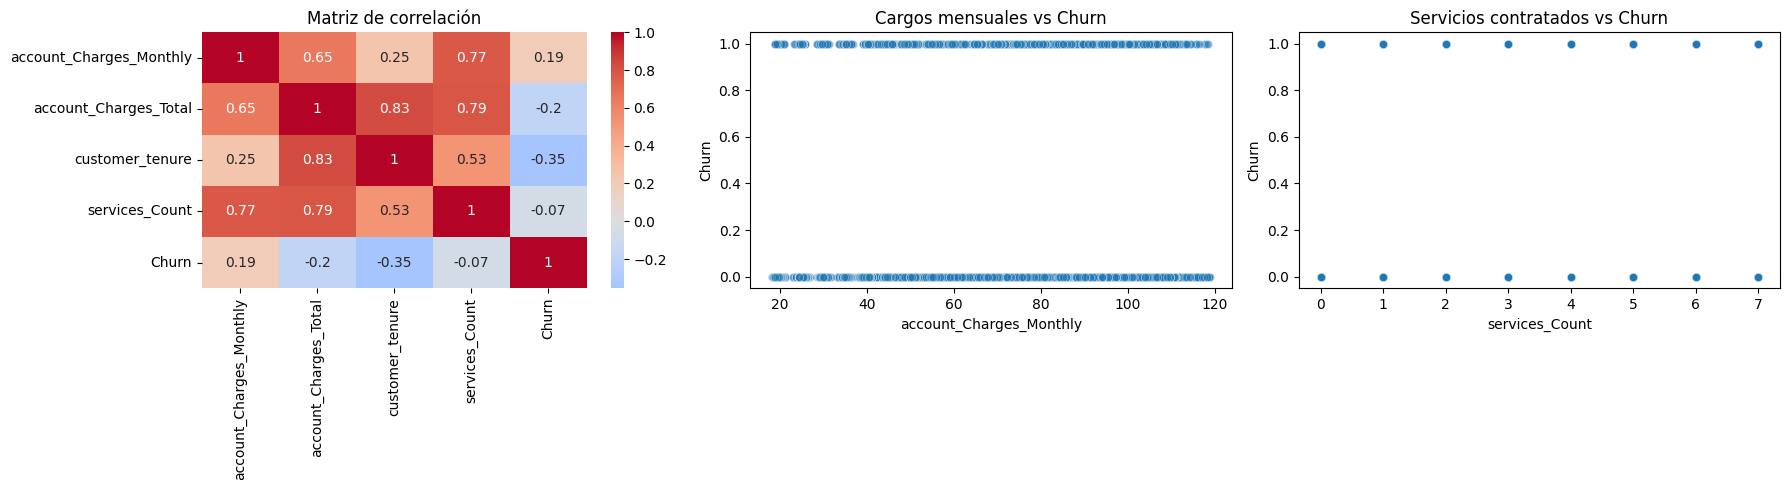

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que las columnas numéricas estén en formato correcto
df['account_Charges_Monthly'] = pd.to_numeric(df['account_Charges_Monthly'], errors='coerce')
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df['customer_tenure'] = pd.to_numeric(df['customer_tenure'], errors='coerce')
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

# Crear variable: cantidad de servicios contratados
service_cols = [
    'phone_PhoneService','phone_MultipleLines',
    'internet_OnlineSecurity','internet_OnlineBackup',
    'internet_DeviceProtection','internet_TechSupport',
    'internet_StreamingTV','internet_StreamingMovies'
]
df['services_Count'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

# Matriz de correlación
corr_matrix = df[['account_Charges_Monthly','account_Charges_Total','customer_tenure','services_Count','Churn']].corr()

# Visualización en subplots

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Heatmap de correlaciones
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Matriz de correlación")

# Scatterplot: cargos mensuales vs churn
sns.scatterplot(data=df, x='account_Charges_Monthly', y='Churn', alpha=0.5, ax=axes[1])
axes[1].set_title("Cargos mensuales vs Churn")

# Scatterplot: cantidad de servicios vs churn
sns.scatterplot(data=df, x='services_Count', y='Churn', alpha=0.5, ax=axes[2])
axes[2].set_title("Servicios contratados vs Churn")

plt.tight_layout()
plt.show()

# **1. Matriz de correlación**
- customer_tenure vs Churn: −0.35
→ Los clientes con más tiempo de permanencia tienen menor probabilidad de churn
- account_Charges_Total vs customer_tenure: 0.83
→ A mayor tiempo, mayor acumulación de cargos totales (relación esperada).
- account_Charges_Monthly vs services_Count: 0.77
→ Clientes con más servicios contratados tienden a tener cargos mensuales más altos.

Interpretación:
Esta matriz te ayuda a identificar qué variables tienen mayor relación con la evasión. Las correlaciones más fuertes (positivas o negativas) son las que pueden ser más útiles para modelos predictivos.

# **2. Scatterplot: Cargos mensuales vs Churn**
Resultados clave:
- Los clientes con churn (valor 1 en eje Y) están distribuidos en todos los niveles de cargos mensuales.
- No hay una separación clara, pero se puede observar mayor densidad de churn en rangos medios-altos de cargos.
Interpretación:
Aunque no hay una correlación fuerte, este gráfico sugiere que los clientes con cargos mensuales más altos podrían tener una ligera tendencia a abandonar, lo que podría explorarse más con segmentación o modelos no lineales.

# **🔹 3. Scatterplot: Servicios contratados vs Churn**
- Los clientes con pocos servicios (0 a 2) tienen mayor presencia en el grupo de churn (valor 1).
- Los clientes con más servicios (5 a 7) tienden a permanecer (valor 0).
Interpretación:
Este gráfico sugiere que cuantos más servicios contrata un cliente, menor es su probabilidad de churn. Esto refuerza la idea de que la diversificación de servicios puede aumentar la fidelización.

# **✨ Conclusión**
- La matriz de correlación te da una visión global de las relaciones entre variables.
- Los scatterplots te permiten ver cómo se distribuyen los clientes en función de churn y variables clave.
- Juntas, estas gráficas te ayudan a identificar factores de riesgo y fidelización, fundamentales para construir modelos predictivos y estrategias de retención.